For decision tress i 

In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('data/breast_cancer.csv', delimiter=',', quotechar='"')

In [2]:
df.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [3]:
features = df.loc[:,"radius_mean":"fractal_dimension_worst"]

In [4]:
features.columns[7]

'concave points_mean'

In [5]:
labels = df["diagnosis"]
#1 for malignant 0 for benign
binary_labels = [1 if x == 'M' else 0 for x in labels]

In [6]:
labels.head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, binary_labels, test_size=0.25)

In [10]:
#plot the depth
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import balanced_accuracy_score,f1_score,precision_score, recall_score

depths = range(1,15)
train_prec= []
cross_val_prec_avg = []
cross_val_prec_std = []

train_recall = []
cross_val_recall_avg = []
cross_val_recall_std = []

estimators = []

test_prec = []
test_recall = []
for i in depths:
    clf = DecisionTreeClassifier(criterion='gini', max_depth=i)
    #scores_precision = cross_validate(clf, X_train, y_train, cv=3, scoring='precision',return_train_score=True,return_estimator=True)
    scores_recall =cross_validate(clf, X_train, y_train, cv=3, scoring='recall',return_train_score=True,return_estimator=True)
    ind= np.argmax(scores_recall['test_score'])
    estimators.append(scores_recall['estimator'][ind])
    #test_pred_prec = scores_precision['estimator'][ind].predict(X_test)
    #test_prec.append(precision_score(test_pred_prec, y_test, average='micro'))
    print(scores_recall["estimator"][ind].feature_importances_)
    print([i for i, e in enumerate(scores_recall["estimator"][ind].feature_importances_) if e != 0])
    train_recall.append(scores_recall['train_score'][0])
    cross_val_recall_std.append(np.std(scores_recall['test_score']))
    cross_val_recall_avg.append(np.average(scores_recall['test_score']))
    train_prec.append(precision_score(scores_recall['estimator'][ind].predict(X_train), y_train))
    
    test_pred_recall = scores_recall['estimator'][ind].predict(X_test)
    test_recall.append(recall_score( y_test, test_pred_recall))
    test_prec.append(precision_score( y_test, test_pred_recall,))

    
    

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0.]
[22]
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.03428363 0.         0.         0.         0.
 0.         0.         0.86640409 0.         0.         0.
 0.         0.         0.         0.09931228 0.         0.        ]
[13, 20, 27]
[0.         0.         0.         0.         0.         0.
 0.         0.06621554 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.12783418 0.75693965 0.
 0.         0.         0.         0.04901063 0.         0.        ]
[7, 21, 22, 27]
[0.         0.         0.         0.         0.         0.
 0.         0.01613584 0.         0.         0.00775443 0.
 0.         0.01256717 0.         0.         0.02945431 0.
 0.         0.         0.         0.10754458 0.71121317 0.
 0.         0.         0.    

In [9]:
from sklearn import tree
tree.export_graphviz(scores_recall['estimator'][ind],class_names=True,out_file='tree.dot', ) 

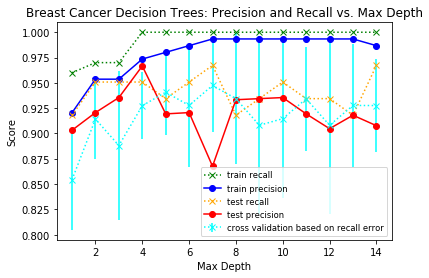

In [11]:
import matplotlib.pyplot as plt
plt.figure()
plt.title('Breast Cancer Decision Trees: Precision and Recall vs. Max Depth')
#plt.ylim((0,1))

plt.plot(depths, list(train_recall), 'x', color='green', label='train recall', linestyle=':')
plt.plot(depths, list(train_prec), 'o-', color='blue', label='train precision')

plt.plot(depths, list(test_recall),'x',color='orange',  label='test recall',linestyle=':')
plt.plot(depths, list(test_prec),'o-',  color='red',  label='test precision')



#plt.errorbar(depths, list(cross_val_prec_avg),yerr=list(cross_val_prec_std),linestyle='-', label='cross validation precision error', color='purple')

plt.errorbar(depths, list(cross_val_recall_avg),yerr=list(cross_val_recall_std), fmt='x',linestyle=':', label='cross validation based on recall error', color='cyan')


plt.savefig('plots/depth_precision_recall_breastCancer')
plt.legend(fontsize='small')
plt.xlabel("Max Depth")
plt.ylabel("Score")
plt.show()
#flattens at depth of 5

In [13]:
cross_val_recall_std

[0.04963052862512357,
 0.03991190264394928,
 0.07339121362903511,
 0.03291782552381695,
 0.04211625951634152,
 0.06035847743792465,
 0.046031264971359565,
 0.06451771676708629,
 0.08791333174253714,
 0.07871473865542937,
 0.05121547941918741,
 0.08791333174253714,
 0.06035847743792465,
 0.04584640045340226]

In [34]:
#visualize the tree
from sklearn import tree
tree.export_graphviz(estimators[2],out_file='tree3.dot', feature_names=features.columns) 

In [1]:
#training set size
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import balanced_accuracy_score,f1_score, accuracy_score, precision_score, recall_score
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import balanced_accuracy_score,f1_score,precision_score, recall_score

df = pd.read_csv('data/breast_cancer.csv', delimiter=',', quotechar='"')
features = df.loc[:,"radius_mean":"fractal_dimension_worst"]
labels = df["diagnosis"]
#1 for malignant 0 for benign
binary_labels = [1 if x == 'M' else 0 for x in labels]

X_train, X_test, y_train, y_test = train_test_split(features, binary_labels, test_size=0.25)


#kNN
portions = range(10, 101, 10)
train_prec= []
cross_val_prec_avg = []
cross_val_prec_std = []

train_recall = []
cross_val_recall_avg = []
cross_val_recall_std = []

estimators = []

test_prec = []
test_recall = []
#params ={V:2}
for i, k in enumerate(portions):
    end = int(len(X_train)* k/100.0)
    print(end, k )
    clf = DecisionTreeClassifier(criterion='gini', max_depth=4)
    X_train, X_test, y_train, y_test = train_test_split(features, binary_labels, test_size=0.25)

    scores_recall =cross_validate(clf, X_train[:end], y_train[:end], cv=3, scoring='recall',return_train_score=True,return_estimator=True)
    ind= np.argmax(scores_recall['test_score'])
    estimators.append(scores_recall['estimator'][ind])
    #test_pred_prec = scores_precision['estimator'][ind].predict(X_test)
    #test_prec.append(precision_score(test_pred_prec, y_test, average='micro'))
    print(scores_recall["estimator"][ind].feature_importances_)
    print([i for i, e in enumerate(scores_recall["estimator"][ind].feature_importances_) if e != 0])
    train_recall.append(scores_recall['train_score'][0])
    cross_val_recall_std.append(np.std(scores_recall['test_score']))
    cross_val_recall_avg.append(np.average(scores_recall['test_score']))
    train_prec.append(precision_score(scores_recall['estimator'][ind].predict(X_train), y_train))
    
    test_pred_recall = scores_recall['estimator'][ind].predict(X_test)
    test_recall.append(recall_score( y_test, test_pred_recall))
    test_prec.append(precision_score( y_test, test_pred_recall,))

42 10
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.14       0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.71308642
 0.         0.         0.         0.14691358 0.         0.        ]
[13, 23, 27]
85 20
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.05757576 0.         0.         0.
 0.         0.         0.         0.18513545 0.6875     0.
 0.         0.0479798  0.         0.021809   0.         0.        ]
[14, 21, 22, 25, 27]
127 30
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.03844394 0.         0.13839817
 0.         0.         0.         0.82315789 0.         0.        ]
[21, 23, 27]
170 40

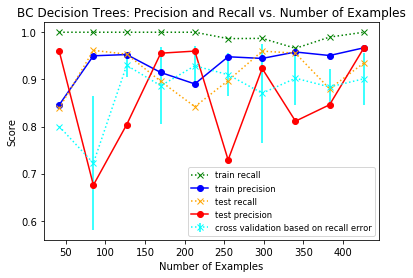

In [2]:
import matplotlib.pyplot as plt
plt.figure()
plt.title('BC Decision Trees: Precision and Recall vs. Number of Examples')
#plt.ylim((0,1))
ps = [int(len(X_train)* p/100.0) for p in portions]

plt.plot(ps, list(train_recall), 'x', color='green', label='train recall', linestyle=':')
plt.plot(ps, list(train_prec), 'o-', color='blue', label='train precision')

plt.plot(ps, list(test_recall),'x',color='orange',  label='test recall',linestyle=':')
plt.plot(ps, list(test_prec),'o-',  color='red',  label='test precision')



#plt.errorbar(depths, list(cross_val_prec_avg),yerr=list(cross_val_prec_std),linestyle='-', label='cross validation precision error', color='purple')

plt.errorbar(ps, list(cross_val_recall_avg),yerr=list(cross_val_recall_std), fmt='x',linestyle=':', label='cross validation based on recall error', color='cyan')


plt.savefig('plots/depth_precision_recall_breastCancer')
plt.legend(fontsize='small')
plt.xlabel("Number of Examples")
plt.ylabel("Score")
plt.show()
#flattens at depth of 5

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
clf = DecisionTreeClassifier(criterion='gini', max_depth=4)
#scores_precision = cross_validate(clf, X_train, y_train, cv=3, scoring='precision',return_train_score=True,return_estimator=True)
scores_recall =cross_validate(clf, X_train, y_train, cv=3, scoring='recall',return_train_score=True,return_estimator=True)
ind= np.argmax(scores_recall['test_score'])

pred = scores_recall['estimator'][ind].predict(X_test)


In [18]:
cm= confusion_matrix(y_test, pred)

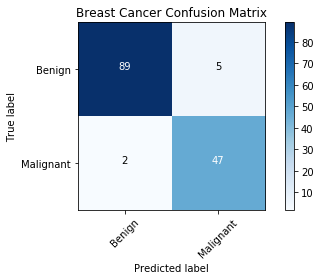

In [25]:
import itertools
import matplotlib.pyplot as plt

cmap=plt.cm.Blues
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title("Breast Cancer Confusion Matrix")
plt.colorbar()
classes = ['Benign', 'Malignant']
tick_marks = np.arange(2)
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
normalize=False
fmt = '.2f' if normalize else 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()